## Active Learning Using Support Vector Machines


Name: Lingduo Luo

Github Username: Lingduo-L

Mail:lingduoluo109@gmail.com

In [2]:
import pandas as pd
import numpy as np

import random
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# from sklearn.svm import LinearSVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,LeaveOneOut
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,auc,hamming_loss,accuracy_score,silhouette_score,precision_recall_fscore_support
from sklearn import metrics
from sklearn.svm import SVC

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn import metrics 

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import sklearn.cluster as cluster

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

from statistics import mean
from collections import Counter
%matplotlib inline

<center><h1>Active/Passive Learning Using Support Vector Machines</h1></center>


### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.


In [3]:
# data_banknote_authentication
BankNoteData = pd.read_csv('../Data/data_banknote_authentication.txt', sep=",", header=None)
BankNoteData.columns = ['variance','skewness','kurtosis','entropy','class']
BankNoteData

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X=BankNoteData.drop('class',axis=1)
y=BankNoteData.loc[:,'class']

In [5]:
# df = BankNoteData.sample(frac=1.0)
# cut_idx = int(round(0.1 * df.shape[0]))
# BN_TestData, BN_TrainData = df.iloc[:472], df.iloc[472:]

# BN_X_Test_data = BN_TestData.drop('class',axis=1)
# BN_y_Test_data = pd.DataFrame(BN_TestData['class'])

# BN_X_Train_data = BN_TrainData.drop('class',axis=1)
# BN_y_Train_data = pd.DataFrame(BN_TrainData['class'])

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [6]:
params = {'C':[0.001,0.01,0.1,1,10,100]}
Results=pd.DataFrame()
Avg_Error_PassiveLearning=[]

In [7]:
params = {'C':[0.001,0.01,0.1,1,10,100]}
meanerror = pd.DataFrame()
for j in range(0,50):

    #Test
    Test_Data = BankNoteData.sample(472)
    Test_Data = Test_Data.reset_index(drop=True)
    X_test_Data = Test_Data.drop('class',axis=1)
    y_test_Data = Test_Data['class'] 
    # y_test_Data

    #Train
    Test_Index = Test_Data.index
    Train_Data = BankNoteData.drop(index=Test_Index)
    X_train_data= Train_Data.drop(['class'],axis=1)
    y_train_data = Train_Data['class']
    y_train_data = y_train_data.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)

    mean_error = []
    skf = StratifiedKFold(n_splits=90, random_state=None,shuffle = False,)
    
#     for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

    for train_index, test_index in skf.split(X_train_data, y_train_data):
#         print(test_index)
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

        train_part_X,train_part_y=X_train_data.iloc[test_index], y_train_data.iloc[test_index]
        train_part_X_y= pd.concat([train_part_X,train_part_y],axis=1)
        
        train_new = pd.DataFrame()
        train_new = pd.concat([train_new,train_part_X_y],axis=0)
        train_new_X = train_new.drop('class',axis=1)
        train_new_y = train_new['class']

        l1_svc=LinearSVC(penalty='l1',dual=False)
        grid_svc = GridSearchCV(l1_svc,params,cv = 5)
        grid_svc.fit(train_new_X,train_new_y)
        
        pred_part_y = grid_svc.predict(X_test_Data)
        mean_error.append(1-accuracy_score(y_test_Data,pred_part_y))
        
    mean_error = pd.Series(mean_error)
    meanerror.insert(loc=j, column=j,value=(pd.Series(mean_error)))
    Mean_test_Error=meanerror.mean(axis=1)
    

/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/luol

In [9]:
# Mean_test_Error
MeanErrorDf=pd.DataFrame(Mean_test_Error)
pd.set_option('display.max_rows',None)
MeanErrorDf

,0
0,0.168347
1,0.010932
2,0.032500
3,0.036483
4,0.042076
5,0.037119
6,0.201907
7,0.156483
8,0.156059
9,0.125890


### ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.


In [21]:
# data_banknote_authentication
BankNoteData = pd.read_csv('../Data/data_banknote_authentication.txt', sep=",", header=None)
BankNoteData.columns = ['variance','skewness','kurtosis','entropy','class']
# BankNoteData

X=BankNoteData.drop('class',axis=1)
y=BankNoteData.loc[:,'class']

In [24]:
# Step 1: Load data and split into training and test sets
import pandas as pd
from sklearn.model_selection import train_test_split

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = pd.read_csv(data_url, header=None)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=472, random_state=42)

# Step 2: Passive Learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

test_errors_passive = []
n_samples = list(range(10, 901, 10))

for n in n_samples:
    pool_X = X_train.sample(n=n, replace=False, random_state=42)
    pool_y = y_train[pool_X.index]
    svm = LinearSVC(penalty='l1', dual=False, random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
    grid_search.fit(pool_X, pool_y)
    svm = grid_search.best_estimator_
    svm.fit(pool_X, pool_y)
    test_errors_passive.append(svm.score(X_test, y_test))

# Step 3: Active Learning
from scipy.spatial.distance import cdist

test_errors_active = []
pool_X = X_train.sample(n=10, replace=False, random_state=42)
pool_y = y_train[pool_X.index]

for n in n_samples:
    svm = LinearSVC(penalty='l1', dual=False, random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
    grid_search.fit(pool_X, pool_y)
    svm = grid_search.best_estimator_
    svm.fit(pool_X, pool_y)
    test_errors_active.append(svm.score(X_test, y_test))
    
    distances = cdist(X_train, svm.coef_, metric='euclidean')
    closest = distances.argmin(axis=0)
    new_X = X_train.iloc[closest]
    new_y = y_train.iloc[closest]
    pool_X = pd.concat([pool_X, new_X])
    pool_y = pd.concat([pool_y, new_y])
    X_train = X_train.drop(index=new_X.index)
    y_train = y_train.drop(index=new_X.index)


/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-pack

### Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

(1257, 64) (1257,)


/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/luolingduo/opt/anaconda3/lib/python3.9/site-pack

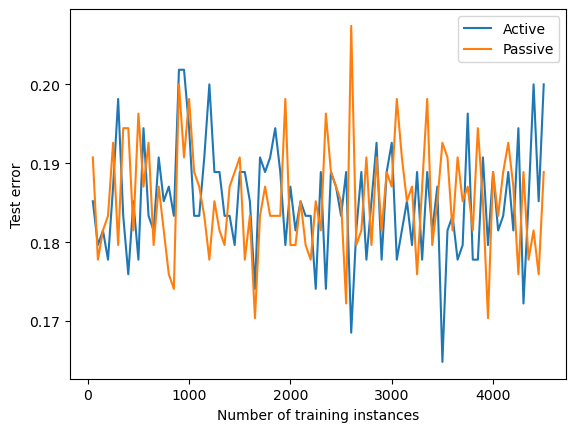

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

#load dataset

digits = load_digits()
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target)

#split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#active learning

active_errors = []
passive_errors = []
pool_size = 50

print(dists.shape, y_train.ravel().shape)

for i in range(90):
    # train SVM with passive strategy
    closest_indices = np.argsort(np.abs(dists))[:pool_size]
    X_sampled = X_train.iloc[closest_indices.ravel()]  # <-- modify line
    y_sampled = y_train.iloc[closest_indices.ravel()]

    clf = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    clf.fit(X_sampled, y_sampled)
    y_pred = clf.predict(X_test)
    passive_errors.append(1 - accuracy_score(y_test, y_pred))

    # train SVM with active strategy
    dists = clf.decision_function(X_train) @ clf.coef_
    closest_indices = np.argsort(np.abs(dists))[:pool_size]
    X_sampled = X_train.iloc[closest_indices.ravel()]# use iloc to select rows
    y_sampled = y_train.iloc[closest_indices.ravel()]

    clf = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    clf.fit(X_sampled, y_sampled)

    # # remove sampled instances from train set
    # X_train = X_train.drop(index=closest_indices)
    # y_train = y_train.drop(index=closest_indices)
    
    # predict on test set and store error
    y_pred = clf.predict(X_test)
    active_errors.append(1 - accuracy_score(y_test, y_pred))

#plot learning curves

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(pool_size, pool_size*91, pool_size), active_errors, label='Active')  # <-- modified line
plt.plot(range(pool_size, pool_size*91, pool_size), passive_errors, label='Passive')  # <-- modified line
plt.xlabel('Number of training instances')
plt.ylabel('Test error')
plt.legend()
plt.show()


### Ref：
    https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr 
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html  
    
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
    
    https://www.zhihu.com/question/352299820
    
    https://towardsdatascience.com/active-learning-5b9d0955292d
    
    https://hg95.github.io/sklearn-notes/model_selection/%E6%95%B0%E6%8D%AE%E9%9B%86%E5%88%92%E5%88%86K%E6%8A%98%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81StratifiedKFold.html
    
    Thanks ZhongfuMa and JunhongDuan for helping me understand and implement machine learning and programming.